In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2024-03-24 21:52:02.448132: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## preparo los datos

In [10]:
datos = pd.read_csv('Boats_Cleaned_dataset.csv')

In [11]:
datos

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,1,7252689,power,power-center,Aquasport,210 CC,1992,used,21.00,8.50,...,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,2019-10-16,10,2019
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.00,11.00,...,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019-09-24,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.00,7.42,...,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019-11-02,11,2019
3,6,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32.00,10.33,...,NaN,multiple,169995.0,34834,North Charleston,SC,29405,2019-09-19,9,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.00,15.00,...,1994.0,inboard,109900.0,17942,Middle River,MD,21220,2018-08-29,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,19996,7127945,power,power-pontoon,Silver Wave,250 Play,2013,used,25.00,8.50,...,NaN,NaN,31973.0,34647,Acworth,GA,30102,2019-06-25,6,2019
18899,19997,7110910,power,power-runabout,Rinker,Captiva 200 MTX,2013,used,19.33,8.00,...,NaN,NaN,26995.0,6335,New Baltimore,MI,48047,2019-06-12,6,2019
18900,19998,6935123,power,power-bay,Blazer,2200,2019,new,22.00,7.67,...,NaN,NaN,39995.0,65602,Seabrook,TX,77586,2018-12-12,12,2018
18901,19999,7079181,power,power-pontoon,Aloha,250,2004,used,25.00,8.50,...,NaN,NaN,16900.0,3180,Sunrise Beach,MO,65079,2019-05-10,5,2019


## separo los datos en, columnas con floats, columnas con strings

In [12]:
columnas_string = datos.select_dtypes(include=['object']).columns.tolist() 
columnas_string

['type',
 'boatClass',
 'make',
 'model',
 'condition',
 'hullMaterial',
 'fuelType',
 'engineCategory',
 'city',
 'state',
 'zip',
 'created_date']

In [13]:
datos_strings = datos[columnas_string]
datos_strings

,type,boatClass,make,model,condition,hullMaterial,fuelType,engineCategory,city,state,zip,created_date
0,power,power-center,Aquasport,210 CC,used,fiberglass,gasoline,outboard-4s,Englewood,FL,34224,2019-10-16
1,power,power-sportcruiser,Formula,400 Super Sport,used,fiberglass,diesel,inboard-outboard,Harsens Island,MI,48028,2019-09-24
2,power,power-deck,Bayliner,Element 180,new,fiberglass,gasoline,outboard-4s,Marietta,OH,45750,2019-11-02
3,power,power-expresscruiser,Regal,32 Express,used,fiberglass,gasoline,multiple,North Charleston,SC,29405,2019-09-19
4,power,power-aft,Carver,440 Aft Cabin Motor Yacht,used,fiberglass,diesel,inboard,Middle River,MD,21220,2018-08-29
...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,Silver Wave,250 Play,used,aluminum,gasoline,NaN,Acworth,GA,30102,2019-06-25
18899,power,power-runabout,Rinker,Captiva 200 MTX,used,fiberglass,gasoline,NaN,New Baltimore,MI,48047,2019-06-12
18900,power,power-bay,Blazer,2200,new,fiberglass,gasoline,NaN,Seabrook,TX,77586,2018-12-12
18901,power,power-pontoon,Aloha,250,used,aluminum,gasoline,NaN,Sunrise Beach,MO,65079,2019-05-10


In [14]:
columnas_float = datos.select_dtypes(include=['float']).columns.tolist()
columnas_float


['length_ft',
 'beam_ft',
 'dryWeight_lb',
 'totalHP',
 'maxEngineYear',
 'minEngineYear',
 'price']

In [15]:
datos_float = datos[columnas_float]
datos_float

,length_ft,beam_ft,dryWeight_lb,totalHP,maxEngineYear,minEngineYear,price
0,21.00,8.50,3000.0,150.0,NaN,NaN,16500.0
1,40.00,11.00,16100.0,800.0,2018.0,2018.0,539000.0
2,18.00,7.42,2000.0,75.0,2019.0,2019.0,26995.0
3,32.00,10.33,12650.0,600.0,NaN,NaN,169995.0
4,44.00,15.00,32000.0,700.0,1994.0,1994.0,109900.0
...,...,...,...,...,...,...,...
18898,25.00,8.50,NaN,NaN,NaN,NaN,31973.0
18899,19.33,8.00,2795.0,0.0,NaN,NaN,26995.0
18900,22.00,7.67,NaN,NaN,NaN,NaN,39995.0
18901,25.00,8.50,NaN,NaN,NaN,NaN,16900.0


## Relleno los NaN con los valores promedio

In [16]:
valores_medios = datos_float.mean()
print(valores_medios)

length_ft            23.803935
beam_ft              16.196930
dryWeight_lb       4754.142697
totalHP             112.849006
maxEngineYear      2007.927438
minEngineYear      2007.919503
price            647146.880930
dtype: float64


In [17]:
datos_float_valoresmedios = datos_float.fillna(valores_medios)
datos_float_valoresmedios


,length_ft,beam_ft,dryWeight_lb,totalHP,maxEngineYear,minEngineYear,price
0,21.00,8.50,3000.000000,150.000000,2007.927438,2007.919503,16500.0
1,40.00,11.00,16100.000000,800.000000,2018.000000,2018.000000,539000.0
2,18.00,7.42,2000.000000,75.000000,2019.000000,2019.000000,26995.0
3,32.00,10.33,12650.000000,600.000000,2007.927438,2007.919503,169995.0
4,44.00,15.00,32000.000000,700.000000,1994.000000,1994.000000,109900.0
...,...,...,...,...,...,...,...
18898,25.00,8.50,4754.142697,112.849006,2007.927438,2007.919503,31973.0
18899,19.33,8.00,2795.000000,0.000000,2007.927438,2007.919503,26995.0
18900,22.00,7.67,4754.142697,112.849006,2007.927438,2007.919503,39995.0
18901,25.00,8.50,4754.142697,112.849006,2007.927438,2007.919503,16900.0


In [18]:
datos_float

,length_ft,beam_ft,dryWeight_lb,totalHP,maxEngineYear,minEngineYear,price
0,21.00,8.50,3000.0,150.0,NaN,NaN,16500.0
1,40.00,11.00,16100.0,800.0,2018.0,2018.0,539000.0
2,18.00,7.42,2000.0,75.0,2019.0,2019.0,26995.0
3,32.00,10.33,12650.0,600.0,NaN,NaN,169995.0
4,44.00,15.00,32000.0,700.0,1994.0,1994.0,109900.0
...,...,...,...,...,...,...,...
18898,25.00,8.50,NaN,NaN,NaN,NaN,31973.0
18899,19.33,8.00,2795.0,0.0,NaN,NaN,26995.0
18900,22.00,7.67,NaN,NaN,NaN,NaN,39995.0
18901,25.00,8.50,NaN,NaN,NaN,NaN,16900.0


## Normalizo los datos_float con valores medios

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
#Este código normalizará todas las columnas del DataFrame utilizando la media y la desviación estándar de cada columna.
scaler = StandardScaler()
datos_float_valoresmedios = pd.DataFrame(scaler.fit_transform(datos_float_valoresmedios), columns=datos_float_valoresmedios.columns)
datos_float_valoresmedios

/Users/maxiabdala/opt/anaconda3/envs/prueba/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/maxiabdala/opt/anaconda3/envs/prueba/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/maxiabdala/opt/anaconda3/envs/prueba/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/maxiabdala/opt/anaconda3/envs/prueba/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

,length_ft,beam_ft,dryWeight_lb,totalHP,maxEngineYear,minEngineYear,price
0,-0.191880,-0.258026,-0.246304,1.328539e-01,0.000000,1.076219e-13,-0.008628
1,1.108337,-0.174218,1.593100,2.457287e+00,2.373329,2.385681e+00,-0.001480
2,-0.397178,-0.294231,-0.386716,-1.353500e-01,2.608953,2.622344e+00,-0.008484
3,0.560877,-0.196678,1.108677,1.742077e+00,0.000000,1.076219e-13,-0.006528
4,1.382067,-0.040125,3.825659,2.099682e+00,-3.281627,-3.294232e+00,-0.007350
...,...,...,...,...,...,...,...
18898,0.081850,-0.258026,0.000000,-5.081874e-17,0.000000,1.076219e-13,-0.008416
18899,-0.306163,-0.274788,-0.275088,-4.035538e-01,0.000000,1.076219e-13,-0.008484
18900,-0.123448,-0.285850,0.000000,-5.081874e-17,0.000000,1.076219e-13,-0.008306
18901,0.081850,-0.258026,0.000000,-5.081874e-17,0.000000,1.076219e-13,-0.008622


## VOY A TRABAJAR CON LAS COLUMNAS CUYOS DATOS SON STRINGS

In [21]:
datos_strings

,type,boatClass,make,model,condition,hullMaterial,fuelType,engineCategory,city,state,zip,created_date
0,power,power-center,Aquasport,210 CC,used,fiberglass,gasoline,outboard-4s,Englewood,FL,34224,2019-10-16
1,power,power-sportcruiser,Formula,400 Super Sport,used,fiberglass,diesel,inboard-outboard,Harsens Island,MI,48028,2019-09-24
2,power,power-deck,Bayliner,Element 180,new,fiberglass,gasoline,outboard-4s,Marietta,OH,45750,2019-11-02
3,power,power-expresscruiser,Regal,32 Express,used,fiberglass,gasoline,multiple,North Charleston,SC,29405,2019-09-19
4,power,power-aft,Carver,440 Aft Cabin Motor Yacht,used,fiberglass,diesel,inboard,Middle River,MD,21220,2018-08-29
...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,Silver Wave,250 Play,used,aluminum,gasoline,NaN,Acworth,GA,30102,2019-06-25
18899,power,power-runabout,Rinker,Captiva 200 MTX,used,fiberglass,gasoline,NaN,New Baltimore,MI,48047,2019-06-12
18900,power,power-bay,Blazer,2200,new,fiberglass,gasoline,NaN,Seabrook,TX,77586,2018-12-12
18901,power,power-pontoon,Aloha,250,used,aluminum,gasoline,NaN,Sunrise Beach,MO,65079,2019-05-10


In [24]:
datos_strings_sin_created_date_sin_zip = datos_strings.drop(['created_date', 'zip'], axis=1)
datos_strings_sin_created_date_sin_zip

,type,boatClass,make,model,condition,hullMaterial,fuelType,engineCategory,city,state
0,power,power-center,Aquasport,210 CC,used,fiberglass,gasoline,outboard-4s,Englewood,FL
1,power,power-sportcruiser,Formula,400 Super Sport,used,fiberglass,diesel,inboard-outboard,Harsens Island,MI
2,power,power-deck,Bayliner,Element 180,new,fiberglass,gasoline,outboard-4s,Marietta,OH
3,power,power-expresscruiser,Regal,32 Express,used,fiberglass,gasoline,multiple,North Charleston,SC
4,power,power-aft,Carver,440 Aft Cabin Motor Yacht,used,fiberglass,diesel,inboard,Middle River,MD
...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,Silver Wave,250 Play,used,aluminum,gasoline,NaN,Acworth,GA
18899,power,power-runabout,Rinker,Captiva 200 MTX,used,fiberglass,gasoline,NaN,New Baltimore,MI
18900,power,power-bay,Blazer,2200,new,fiberglass,gasoline,NaN,Seabrook,TX
18901,power,power-pontoon,Aloha,250,used,aluminum,gasoline,NaN,Sunrise Beach,MO


In [28]:
columnas_string

['type',
 'boatClass',
 'make',
 'model',
 'condition',
 'hullMaterial',
 'fuelType',
 'engineCategory',
 'city',
 'state',
 'zip',
 'created_date']

In [41]:
for i in columnas_string[:-2]:
    if i in datos_strings_categorizado.columns:
        dummy_columnas = pd.get_dummies(datos_strings_categorizado[i], prefix=i)
        datos_strings_categorizado = pd.concat([datos_strings_categorizado, dummy_columnas], axis=1)
        datos_strings_categorizado.drop([i], axis=1, inplace=True)

In [42]:
datos_strings_categorizado

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,type_power,type_sail,type_unpowered
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
18899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
18900,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
18901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [43]:
columnas = datos_strings_categorizado.select_dtypes(include=['bool']).columns.tolist() 
columnas

['state_AK',
 'state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 'state_TX',
 'state_UT',
 'state_VA',
 'state_VT',
 'state_WA',
 'state_WI',
 'state_WV',
 'type_power',
 'type_sail',
 'type_unpowered',
 'boatClass_power-aft',
 'boatClass_power-airboat',
 'boatClass_power-aluminum',
 'boatClass_power-antique',
 'boatClass_power-barge',
 'boatClass_power-bass',
 'boatClass_power-bay',
 'boatClass_power-bowrider',
 'boatClass_power-center',
 'boatClass_power-commercial',
 'boatClass_power-convertible',
 'boatClass_

## convierto los valores bool en 0 y 1

In [45]:
datos_strings_categorizado_0_1 = datos_strings_categorizado.astype(int)
datos_strings_categorizado_0_1

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,type_power,type_sail,type_unpowered
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
18899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18900,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
18901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## UNIFICO CON CONCAT LOS DATOS YA TRABAJADOS

In [48]:
datos_trabajados = pd.concat([datos_float_valoresmedios,datos_strings_categorizado_0_1], axis=1)
datos_trabajados


,length_ft,beam_ft,dryWeight_lb,totalHP,maxEngineYear,minEngineYear,price,state_AK,state_AL,state_AR,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,type_power,type_sail,type_unpowered
0,-0.191880,-0.258026,-0.246304,1.328539e-01,0.000000,1.076219e-13,-0.008628,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.108337,-0.174218,1.593100,2.457287e+00,2.373329,2.385681e+00,-0.001480,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.397178,-0.294231,-0.386716,-1.353500e-01,2.608953,2.622344e+00,-0.008484,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.560877,-0.196678,1.108677,1.742077e+00,0.000000,1.076219e-13,-0.006528,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.382067,-0.040125,3.825659,2.099682e+00,-3.281627,-3.294232e+00,-0.007350,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,0.081850,-0.258026,0.000000,-5.081874e-17,0.000000,1.076219e-13,-0.008416,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18899,-0.306163,-0.274788,-0.275088,-4.035538e-01,0.000000,1.076219e-13,-0.008484,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18900,-0.123448,-0.285850,0.000000,-5.081874e-17,0.000000,1.076219e-13,-0.008306,0,0,0,...,1,0,0,0,0,0,0,1,0,0
18901,0.081850,-0.258026,0.000000,-5.081874e-17,0.000000,1.076219e-13,-0.008622,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## separo los datos que quiero predecir de los de train

In [53]:
datos_train = datos_trabajados.drop('price', axis=1)
datos_train

,length_ft,beam_ft,dryWeight_lb,totalHP,maxEngineYear,minEngineYear,state_AK,state_AL,state_AR,state_AZ,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,type_power,type_sail,type_unpowered
0,-0.191880,-0.258026,-0.246304,1.328539e-01,0.000000,1.076219e-13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.108337,-0.174218,1.593100,2.457287e+00,2.373329,2.385681e+00,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.397178,-0.294231,-0.386716,-1.353500e-01,2.608953,2.622344e+00,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.560877,-0.196678,1.108677,1.742077e+00,0.000000,1.076219e-13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.382067,-0.040125,3.825659,2.099682e+00,-3.281627,-3.294232e+00,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,0.081850,-0.258026,0.000000,-5.081874e-17,0.000000,1.076219e-13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18899,-0.306163,-0.274788,-0.275088,-4.035538e-01,0.000000,1.076219e-13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18900,-0.123448,-0.285850,0.000000,-5.081874e-17,0.000000,1.076219e-13,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
18901,0.081850,-0.258026,0.000000,-5.081874e-17,0.000000,1.076219e-13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
datos_predict = datos_trabajados['price']
datos_predict

0       -0.008628
1       -0.001480
2       -0.008484
3       -0.006528
4       -0.007350
           ...   
18898   -0.008416
18899   -0.008484
18900   -0.008306
18901   -0.008622
18902   -0.008609
Name: price, Length: 18903, dtype: float64

In [60]:
datos_train.shape

(18903, 10214)

## MODELO CON KERAS

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((None,10214,)),# no olvidar que hay que indicar la cantidad de  columnas del input
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [76]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [77]:
history = model.fit(datos_train, datos_predict, validation_split=0.2, epochs=10)

Epoch 1/10
473/473 [==============================] - 3s 5ms/step - loss: 0.1676 - accuracy: 0.0000e+00 - val_loss: 0.1420 - val_accuracy: 0.0000e+00
Epoch 2/10
473/473 [==============================] - 1s 3ms/step - loss: -0.0579 - accuracy: 0.0000e+00 - val_loss: 0.3197 - val_accuracy: 0.0000e+00
Epoch 3/10
473/473 [==============================] - 1s 3ms/step - loss: -0.2012 - accuracy: 0.0000e+00 - val_loss: 1.0881 - val_accuracy: 0.0000e+00
Epoch 4/10
473/473 [==============================] - 1s 3ms/step - loss: -0.9060 - accuracy: 0.0000e+00 - val_loss: 4.8905 - val_accuracy: 0.0000e+00
Epoch 5/10
473/473 [==============================] - 2s 4ms/step - loss: -3.3963 - accuracy: 0.0000e+00 - val_loss: 15.3542 - val_accuracy: 0.0000e+00
Epoch 6/10
473/473 [==============================] - 1s 3ms/step - loss: -8.5946 - accuracy: 0.0000e+00 - val_loss: 33.8120 - val_accuracy: 0.0000e+00
Epoch 7/10
473/473 [==============================] - 1s 3ms/step - loss: -16.4229 - accuracy

In [78]:
test_loss, test_acc = model.evaluate(datos_train,datos_predict, verbose=2)

591/591 - 1s - loss: -1.6291e+01 - accuracy: 0.0000e+00 - 1s/epoch - 2ms/step


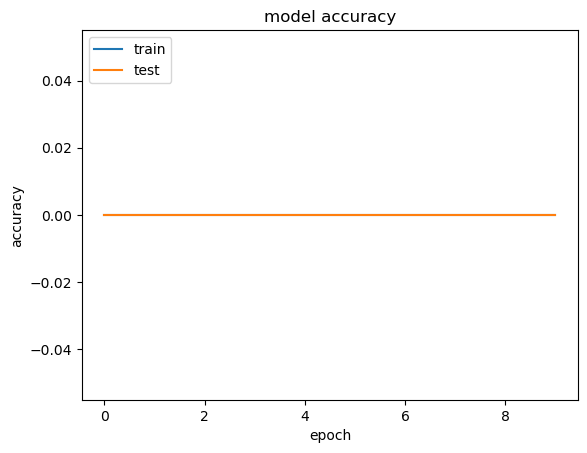

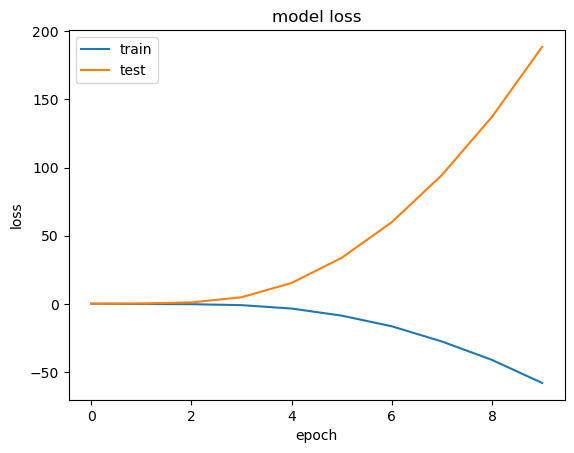

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pd.concat()